In [ ]:
# Import pandas library for data manipulation and analysis
import pandas as pd  # Fixed: Changed 'pdx' to standard 'pd' alias for pandas

In [ ]:
# Import necessary libraries for machine learning and data preprocessing
from sklearn.preprocessing import LabelEncoder  # For converting categorical data (text) to numerical values
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing portions
from sklearn.metrics import (  # Import multiple evaluation metrics to assess model performance
    accuracy_score,      # Calculates overall correctness percentage (correct predictions / total predictions)
    f1_score,           # Calculates harmonic mean of precision and recall (balanced metric)
    precision_score,    # Calculates true positives / (true positives + false positives)
    confusion_matrix,   # Creates matrix showing actual vs predicted classifications
    roc_auc_score,      # Calculates area under ROC curve (receiver operating characteristic)
    recall_score,       # Calculates true positives / (true positives + false negatives)
    roc_curve           # Generates data points for plotting ROC curve
)
from sklearn.tree import DecisionTreeClassifier,plot_tree  # Decision tree algorithm and tree visualization tool

In [ ]:
# Load the Social Networks dataset from CSV file into a pandas DataFrame
df=pd.read_csv("Social_networks.csv")  # Read CSV file and store data in 'df' variable for analysis

In [ ]:
# Display the entire dataset to examine its structure, columns, and data types
df  # Shows all rows and columns of the DataFrame in tabular format

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No
...,...,...,...,...,...
395,15672330,1,47,34000,Yes
396,15807837,1,48,33000,Yes
397,15592570,1,47,23000,Yes
398,15635893,1,60,42000,Yes


In [ ]:
# Separate features (independent variables) and target variable for machine learning
x= df[['Gender', 'Age', 'EstimatedSalary']]  # Features: input variables used to make predictions
y = df['Purchased']  # Target variable: output we want to predict (0=No, 1=Yes)

In [ ]:
# Encode categorical variables to numerical values for machine learning algorithms
label_encoder=LabelEncoder()  # Create LabelEncoder object to convert text to numbers

# Convert Gender column from categorical text (Male/Female) to numerical values (0/1)
x['Gender']=label_encoder.fit_transform(x['Gender'])  # fit_transform learns mapping and applies it
# Convert target variable from categorical text (Yes/No) to numerical values (0/1)
y=label_encoder.fit_transform(y)  # Transform target variable for classification
x  # Display the encoded features DataFrame with numerical Gender values

C:\Users\akhil\AppData\Local\Temp\ipykernel_16244\787758776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Gender']=label_encoder.fit_transform(x['Gender'])


,Gender,Age,EstimatedSalary
0,0,26,43000
1,0,27,57000
2,0,27,84000
3,0,35,65000
4,0,26,80000
...,...,...,...
395,1,47,34000
396,1,48,33000
397,1,47,23000
398,1,60,42000


In [ ]:
# Display the encoded target variable to verify successful conversion
y  # Shows array of 0s and 1s instead of original Yes/No text values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# Split the dataset into training and testing sets for model evaluation
# 75% of data for training the model, 25% for testing its performance
# random_state=42 ensures reproducible results across different runs
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
# Create and train the Decision Tree classifier model
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)  # Use entropy for information gain calculations
clf.fit(x_train,y_train)  # Train the model using training data (learns patterns from features to predict target)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
# Define a comprehensive function to calculate multiple evaluation metrics for model assessment
def metrics_eval(y_pred,y_test,y_pred_proba=None):
    # Calculate accuracy: ratio of correct predictions to total predictions
    accuracy_scores = accuracy_score(y_true=y_test, y_pred=y_pred)
    
    # Create confusion matrix: 2x2 table showing actual vs predicted classifications
    confusion_matrixs = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    # Calculate recall (sensitivity): ability to correctly identify positive cases
    recall_scores = recall_score(y_true=y_test, y_pred=y_pred)
    
    # Calculate precision: accuracy of positive predictions (reduces false positives)
    precision_scores = precision_score(y_true=y_test, y_pred=y_pred)
    
    # Calculate F1 score: harmonic mean balancing precision and recall
    f1_scores = f1_score(y_true=y_test, y_pred=y_pred)
    
    # Calculate ROC AUC score: area under ROC curve measuring classifier performance
    roc_auc_scores = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

    # Return all calculated metrics as a tuple for easy access
    return accuracy_scores,confusion_matrixs,recall_scores,precision_scores,f1_scores,roc_auc_scores

In [ ]:
# Make predictions on the test set using the trained decision tree model
y_pred=clf.predict(x_test)  # Generate class predictions (0 or 1) for unseen test data

In [ ]:
# Get prediction probabilities for each class (0 and 1) for all test samples
y_pred_proba=clf.predict_proba(x_test)  # Returns probability matrix with confidence scores
y_pred_proba  # Display the probability matrix [prob_class_0, prob_class_1] for each prediction

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. ,

In [ ]:
# Extract probabilities for positive class (class 1 = "Yes") only
y_pred_proba[:,1]  # Select second column (index 1) containing probabilities for positive predictions

array([0. , 1. , 0. , 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0. , 1. , 0. ,
       0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 1. ,
       0. , 0. , 1. , 0. , 1. , 0. , 1. , 0. , 0. , 0. , 0. , 1. , 0. ,
       0. , 1. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 1. ,
       1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0. ,
       0.5, 1. , 1. , 1. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 1. , 1. , 1. , 0. ,
       1. , 0. , 0. , 0. , 1. , 1. , 1. , 0. , 0. ])

In [ ]:
# Extract prediction probabilities for the positive class and calculate all evaluation metrics
y_pred_proba=clf.predict_proba(x_test)[:,1]  # Get probabilities for class 1 (positive predictions)

# Initialize empty list to store all calculated metrics
l1=[]  
# Iterate through each metric returned by the metrics_eval function
for i in metrics_eval(y_pred,y_test,y_pred_proba):  # Call function with predictions and probabilities
    l1.append(i)  # Add each metric (accuracy, confusion matrix, etc.) to the list

In [ ]:
# Display all evaluation metrics with descriptive labels for model performance analysis
print(f"accurracy score:{l1[0]}")      # Index 0: Overall accuracy percentage (correct/total)
print(f"confusion matrix:{l1[1]}")     # Index 1: 2x2 matrix showing true vs predicted classifications
print(f"recall score:{l1[2]}")         # Index 2: Sensitivity (true positive rate)
print(f"precision score:{l1[3]}")      # Index 3: Positive predictive value
print(f"f1 score :{l1[4]}")           # Index 4: Harmonic mean of precision and recall
print(f"roc auc score:{l1[5]}")       # Index 5: Area under ROC curve (discrimination ability)

accurracy score:0.91
confusion matrix:[[61  6]
 [ 3 30]]
recall score:0.9090909090909091
precision score:0.8333333333333334
f1 score :0.8695652173913043
roc auc score:0.9090909090909092


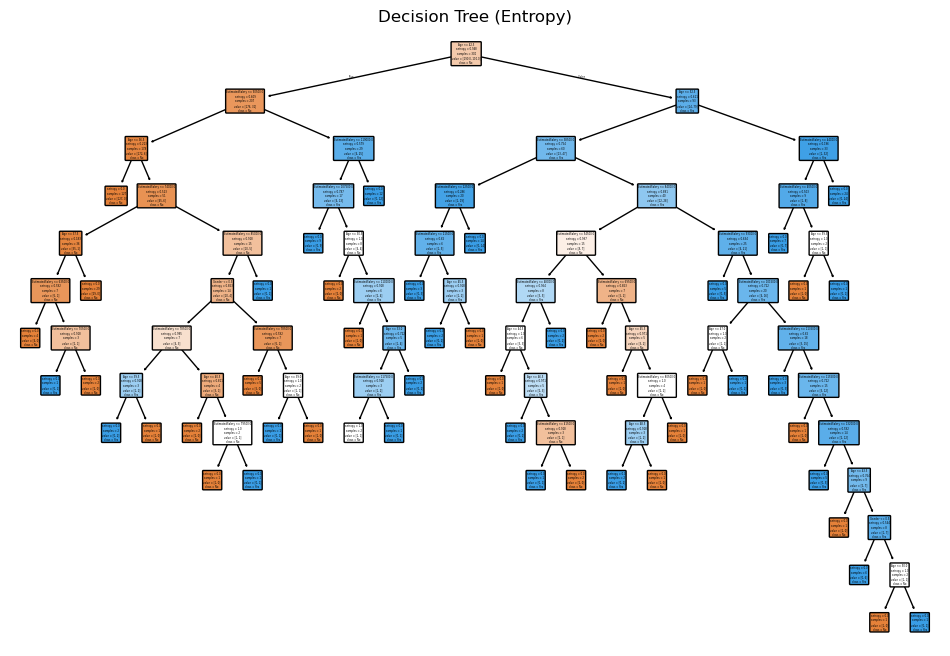

In [ ]:
# Create a visual representation of the decision tree structure
import matplotlib.pyplot as plt  # Import matplotlib library for creating plots and visualizations

plt.figure(figsize=(12,8))  # Set figure size to 12x8 inches for better readability
# Plot the decision tree with detailed labeling and styling
plot_tree(clf, feature_names=x.columns, class_names=['No', 'Yes'], filled=True, rounded=True)
# feature_names: labels for input features, class_names: labels for output classes
# filled=True: colors nodes based on class, rounded=True: rounds node corners
plt.title("Decision Tree (Entropy)")  # Add descriptive title to the visualization
plt.show()  # Display the completed tree diagram

In [ ]:
# Display the test set features to examine the data used for model predictions
x_test  # Shows the feature values (Gender, Age, EstimatedSalary) for test samples

,Gender,Age,EstimatedSalary
209,1,28,32000
280,0,51,146000
33,0,28,87000
210,1,24,84000
93,0,38,112000
...,...,...,...
314,0,47,51000
373,1,36,125000
380,1,47,105000
239,1,42,54000


In [ ]:
# Test decision trees with different maximum depths to find optimal complexity and prevent overfitting
depths = [None, 3, 5, 7]  # None = unlimited depth, 3/5/7 = limited maximum tree depths
result=[]  # Initialize empty list to store results for each depth configuration

for i in depths:  # Iterate through each maximum depth value
    
    # Create new decision tree classifier with current max_depth setting
    model=DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=42)
    model.fit(x_train,y_train)  # Train the model using training data
    
    # Generate predictions on test set using current model
    y_pred=model.predict(x_test)  # Get class predictions (0 or 1)
    y_predict_proba=model.predict_proba(x_test)[:,1]  # Get probabilities for positive class
    
    # Calculate all evaluation metrics for current model configuration
    l1=[]  # Initialize list to store metrics for this specific depth
    for j in metrics_eval(y_pred,y_test,y_pred_proba):  # Get all performance metrics
        l1.append(j)  # Add each metric to the list
    
    # Store the depth value and its corresponding performance metrics
    result.append((i,l1))  # Append tuple of (depth, metrics_list) to results

In [ ]:
# Display the class predictions from the last trained model (max_depth=7)
y_pred  # Shows array of 0s and 1s representing predicted classes for test samples

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0])

: 

In [ ]:
# Display the prediction probabilities from the last trained model (max_depth=7)
y_predict_proba  # Shows confidence scores (0-1) for positive class predictions

array([0.        , 0.8       , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.25      , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.66666667, 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.25      , 1.        , 0.6       , 0.        , 1.        ,
       0.        , 0.        , 0.5       , 0.        , 0.        ,
       0.25      , 1.        , 0.        , 0.        , 0.        ,
       0.66666667, 1.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.     

In [ ]:
# Display the results comparison DataFrame (will show error until df_result is properly created)
df_result  # Shows performance metrics comparison across different maximum depth values

,Max_Depth,Accuracy,TN,TP,Recall,Precision,F1_Score,ROC_AUC
0,NaN,0.91,61,30,0.909091,0.833333,0.869565,0.909091
1,3.0,0.90,60,30,0.909091,0.810811,0.857143,0.947535
2,5.0,0.92,61,31,0.939394,0.837838,0.885714,0.947761
3,7.0,0.90,60,30,0.909091,0.810811,0.857143,0.922886


In [ ]:
# Create a comprehensive DataFrame to compare model performance across different max_depth values
df_result = pd.DataFrame(
    [(depth, *metrics) for depth, metrics in result],  # Unpack each (depth, metrics_list) tuple
    # Use list comprehension to flatten: depth as first column, then unpack all metrics
    columns=["Max_Depth", "Accuracy", "Confusion_Matrix", "Recall", "Precision", "F1_Score", "ROC_AUC"]
    # Define column names corresponding to: depth value and all evaluation metrics
)

In [ ]:
# Display the final comparison table showing performance metrics for different max_depth values
df_result  # Shows tabular comparison to help select optimal tree depth based on various metrics

,Max_Depth,Accuracy,Confusion_Matrix,Recall,Precision,F1_Score,ROC_AUC
0,NaN,0.91,"[[61, 6], [3, 30]]",0.909091,0.833333,0.869565,0.909091
1,3.0,0.90,"[[60, 7], [3, 30]]",0.909091,0.810811,0.857143,0.909091
2,5.0,0.92,"[[61, 6], [2, 31]]",0.939394,0.837838,0.885714,0.909091
3,7.0,0.90,"[[60, 7], [3, 30]]",0.909091,0.810811,0.857143,0.909091
